# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [2]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  8198k      0 --:--:--  0:01:49 --:--:-- 8323k


In [4]:
!gunzip SUSY.csv.gz

In [5]:
ls -lh

total 2.3G
-rw-r--r-- 1 diegom04 diegom04 390K Mar 23 15:07 Lab.7.ipynb
-rw-r--r-- 1 diegom04 diegom04 5.9M Mar 23 14:48 Lab.7.pdf
-rw-r--r-- 1 diegom04 diegom04 2.3G Mar 23 15:03 SUSY.csv


The data is provided as a comma separated file.

In [6]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [7]:
!ls -lh

total 2.3G
-rw-r--r-- 1 diegom04 diegom04 390K Mar 23 15:09 Lab.7.ipynb
-rw-r--r-- 1 diegom04 diegom04 5.9M Mar 23 14:48 Lab.7.pdf
-rw-r--r-- 1 diegom04 diegom04 2.3G Mar 23 15:03 SUSY.csv


We see that we have 5 million datapoints.

In [8]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [9]:
!head -500000 SUSY.csv > SUSY-small.csv

In [10]:
ls -lh

total 2.5G
-rw-r--r-- 1 diegom04 diegom04 389K Mar 23 15:11 Lab.7.ipynb
-rw-r--r-- 1 diegom04 diegom04 5.9M Mar 23 14:48 Lab.7.pdf
-rw-r--r-- 1 diegom04 diegom04 228M Mar 23 15:11 SUSY-small.csv
-rw-r--r-- 1 diegom04 diegom04 2.3G Mar 23 15:03 SUSY.csv


In [11]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [3]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [4]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [5]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [6]:
FeatureNames

['cos_theta_r1',
 'dPhi_r_b',
 'M_TR_2',
 'M_R',
 'axial_MET',
 'R',
 'M_Delta_R',
 'MET_rel',
 'MT2',
 'S_R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [8]:
filename = "SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [9]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,0.719035,1.091879,0.291540,1.205962,-1.599117,-1.139445,0.424546,1.154849,0.637185,-0.091178,1.972156,0.697028,0.313636,0.988602,1.981573,0.744828,1.095080,0.006546
499996,1.0,0.910016,-0.364544,-0.777120,0.543648,-0.910632,-1.723707,2.864673,1.458272,2.176558,-0.590911,0.673695,1.662140,2.189362,1.195041,0.910815,1.181893,1.252362,0.826035
499997,1.0,0.842954,0.332476,-1.048564,1.347989,0.320496,-0.666358,0.450433,-0.411872,0.293407,0.630491,0.859920,0.403371,0.416258,0.591989,0.372003,0.716788,0.366991,0.265798
499998,0.0,1.370760,-1.162912,0.893499,2.118091,1.248496,-0.887211,0.164659,0.316840,0.215165,0.280418,3.087083,0.526929,0.151467,0.308067,3.098183,0.233042,0.876216,0.000593


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [10]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


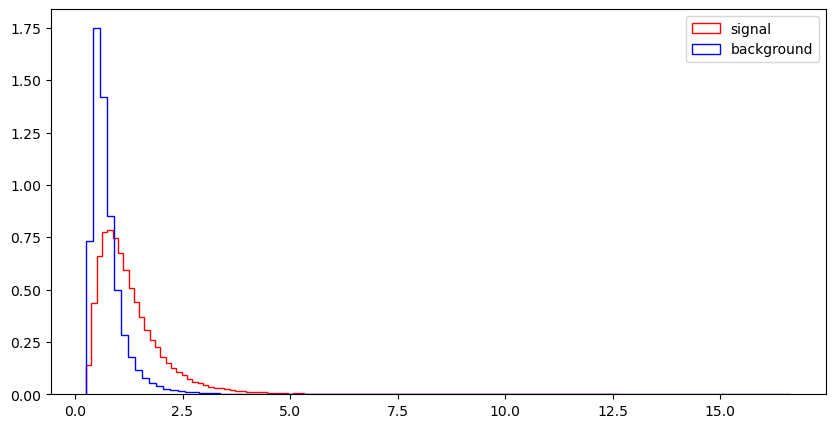

l_1_eta


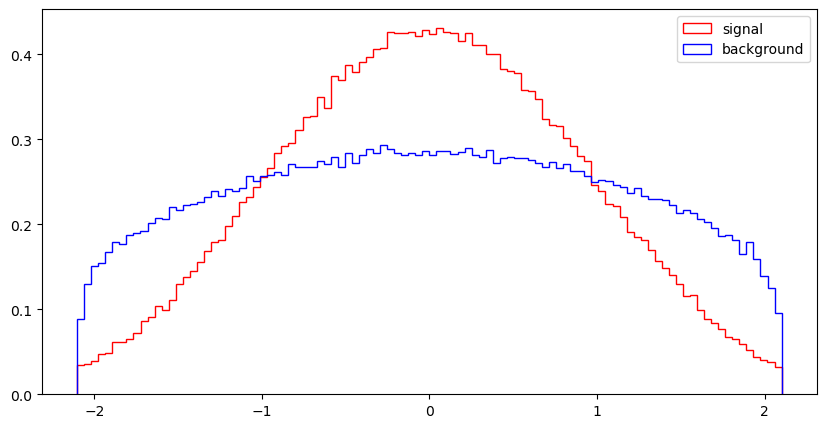

l_1_phi


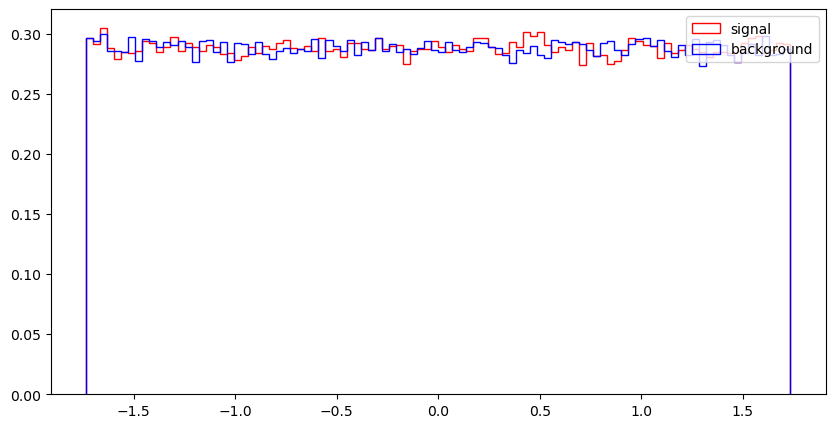

l_2_pT


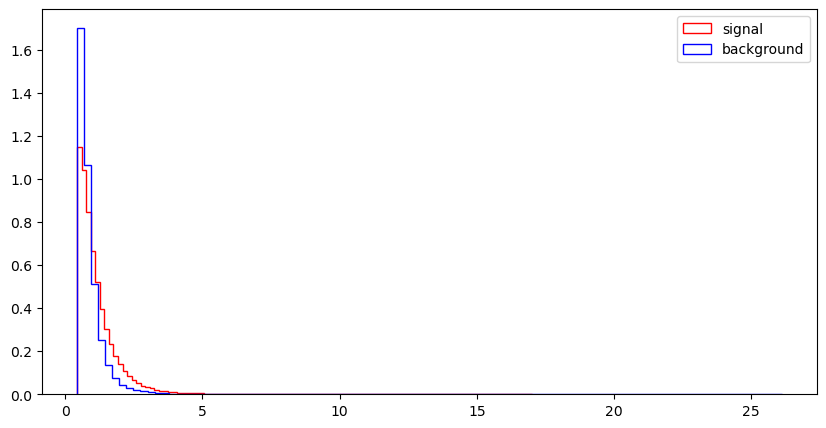

l_2_eta


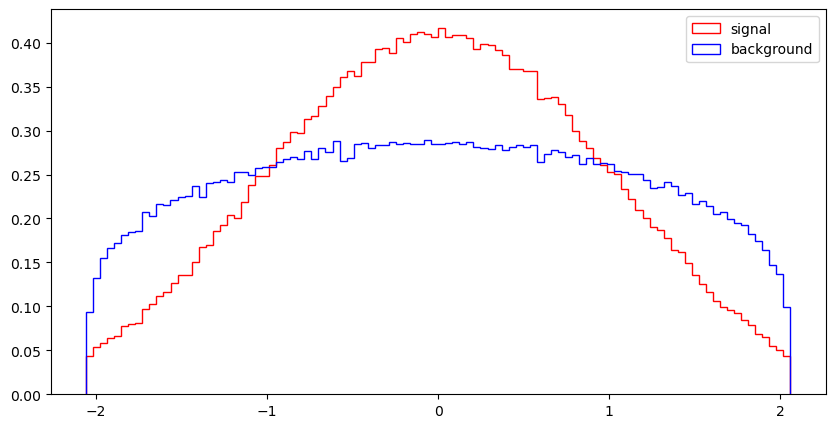

l_2_phi


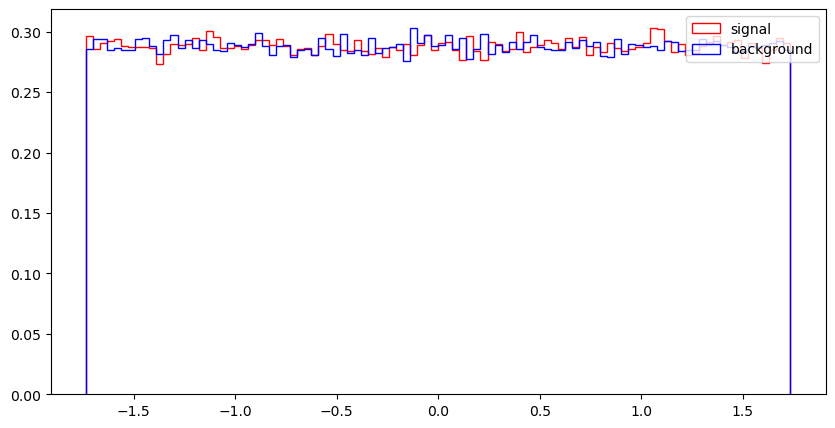

MET


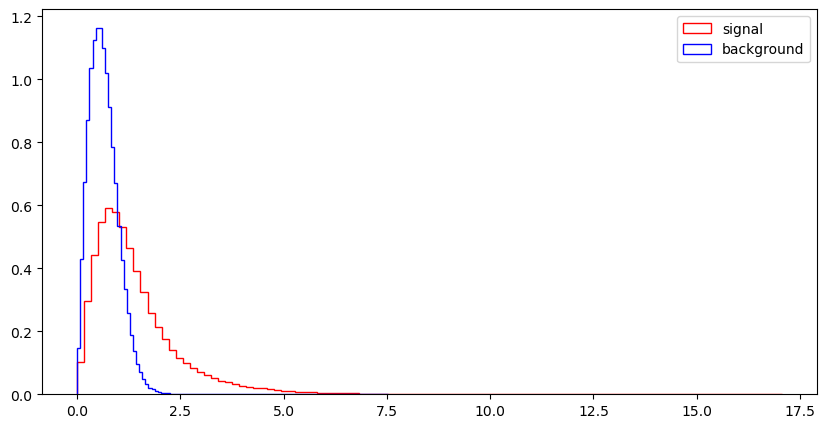

MET_phi


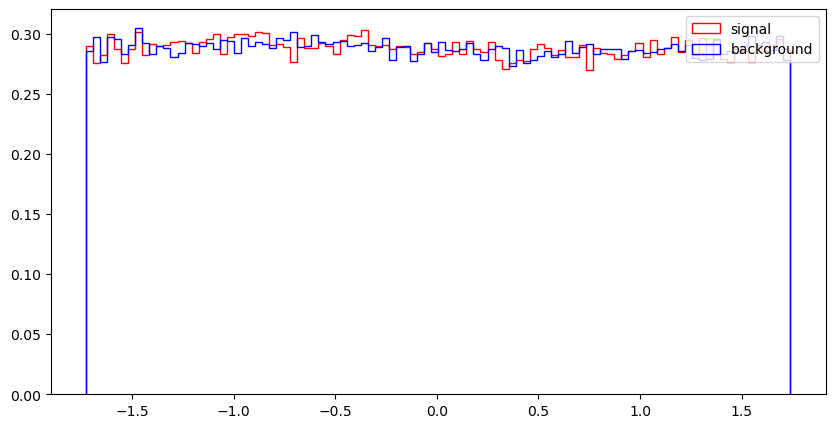

MET_rel


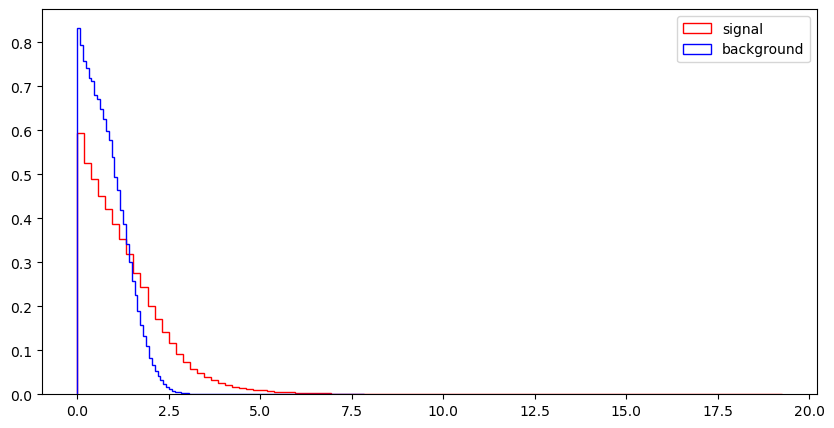

axial_MET


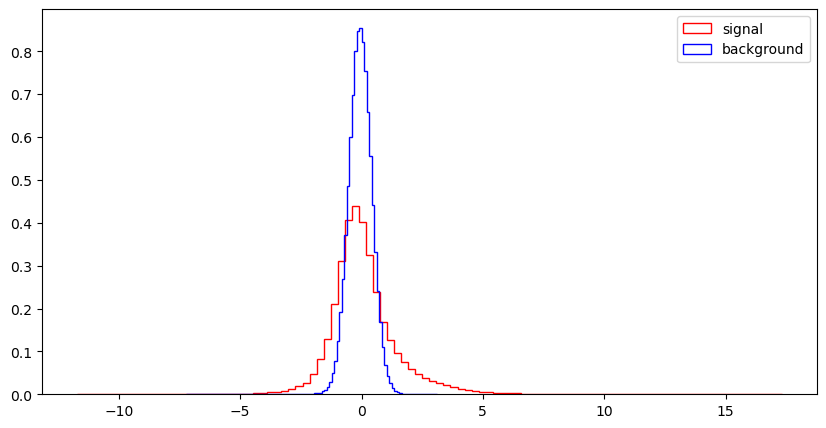

M_R


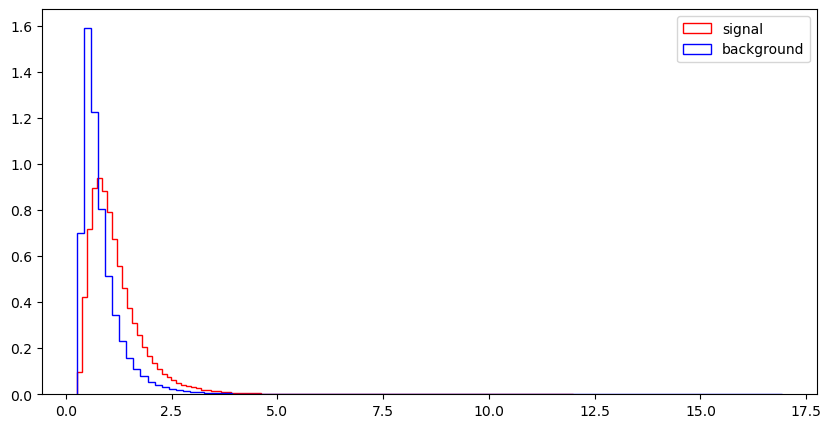

M_TR_2


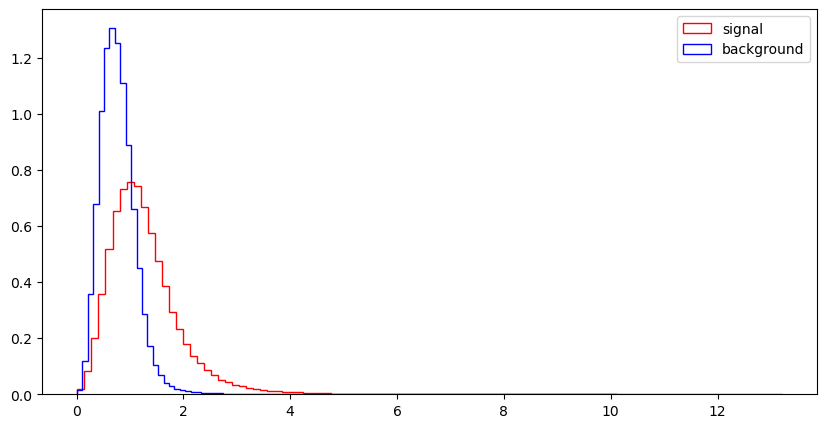

R


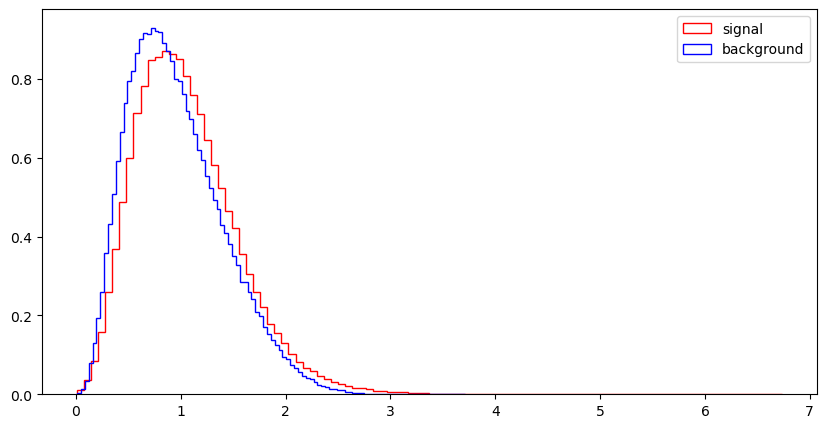

MT2


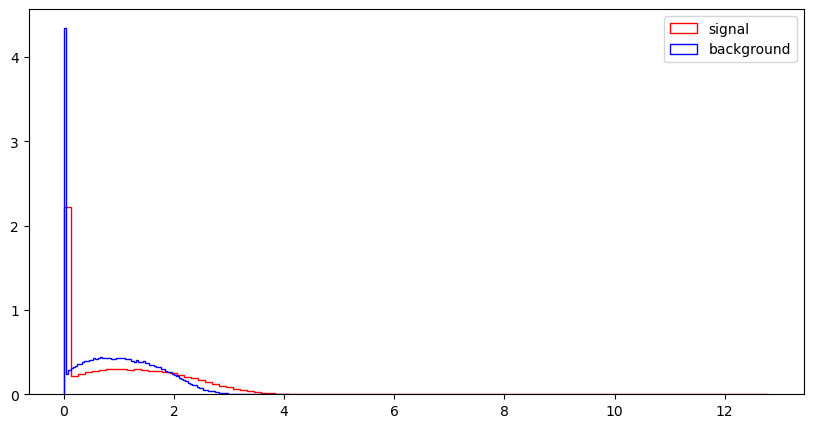

S_R


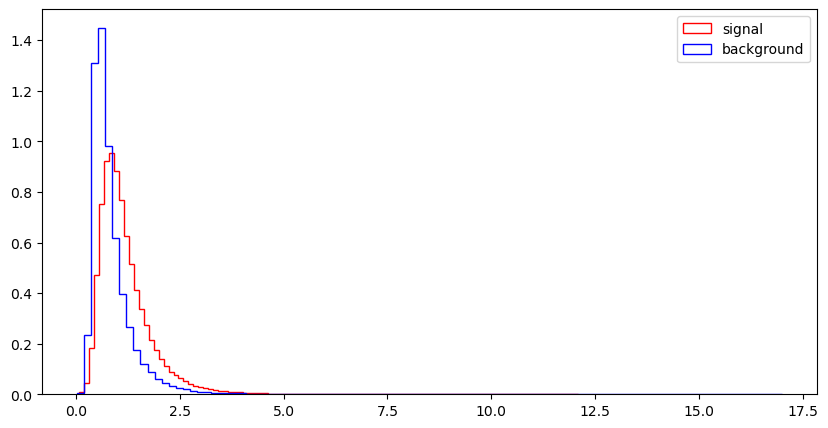

M_Delta_R


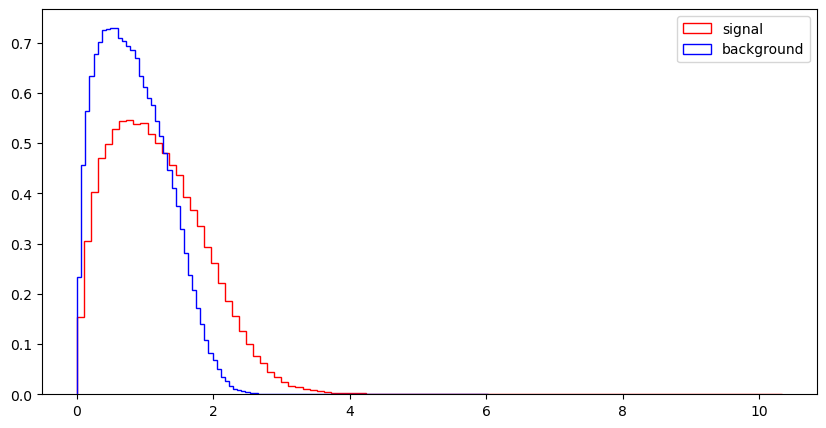

dPhi_r_b


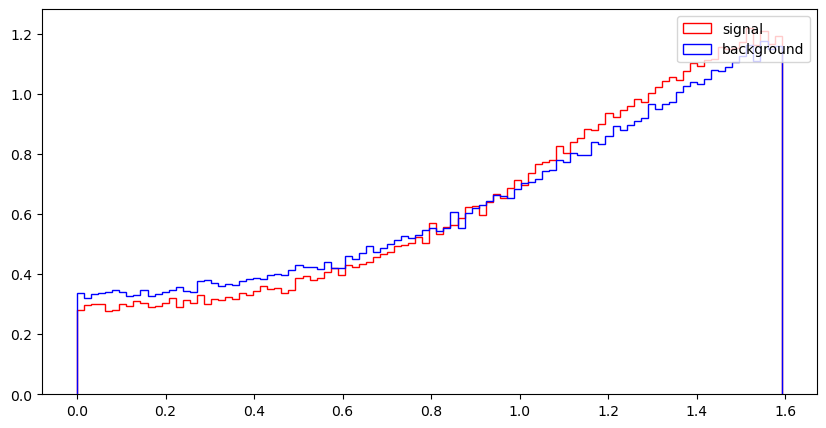

cos_theta_r1


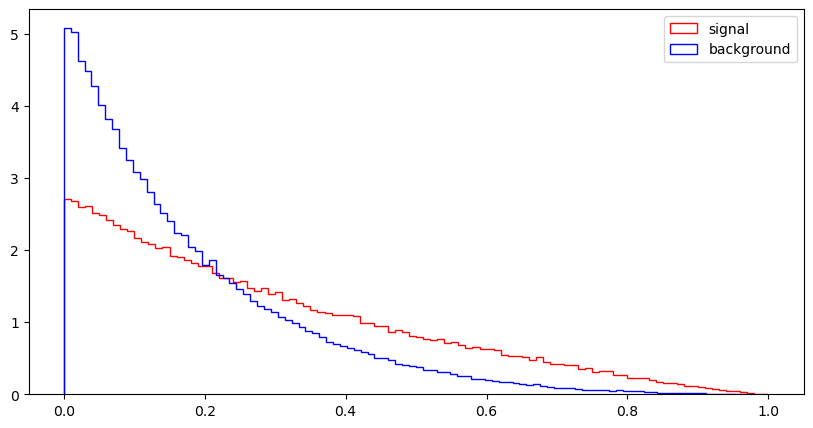

In [11]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

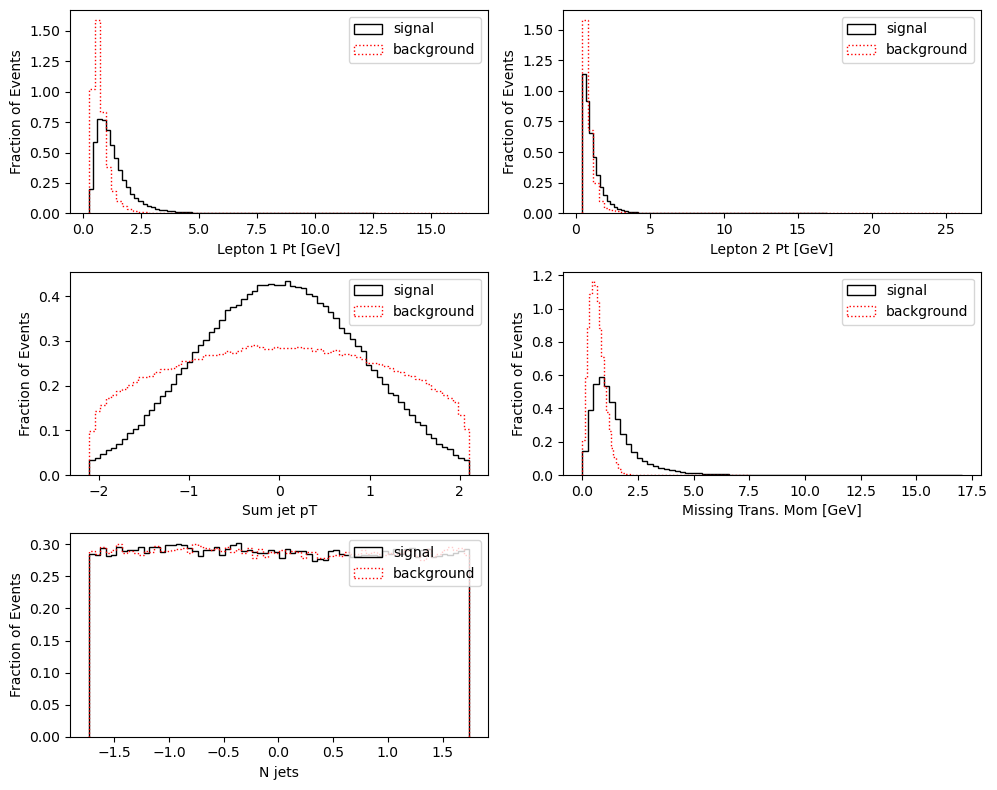

In [12]:
fig5_vars = ["l_1_pT", "l_2_pT", "l_1_eta", "MET", "MET_phi"]
x_names = ["Lepton 1 Pt [GeV]", "Lepton 2 Pt [GeV]", "Sum jet pT", "Missing Trans. Mom [GeV]", "N jets"]

fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs = axs.flatten()  

for i, var in enumerate(fig5_vars):
    axs[i].hist(np.array(df_sig[var]),bins=70,histtype="step", color="black",label="signal",density=1, stacked=True)
    axs[i].hist(np.array(df_bkg[var]),bins=70,histtype="step", color="red", label="background",density=1, stacked=True, linestyle="dotted")
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel(x_names[i])
    axs[i].set_ylabel("Fraction of Events")

fig.delaxes(axs[-1]) 
plt.tight_layout()
plt.show()

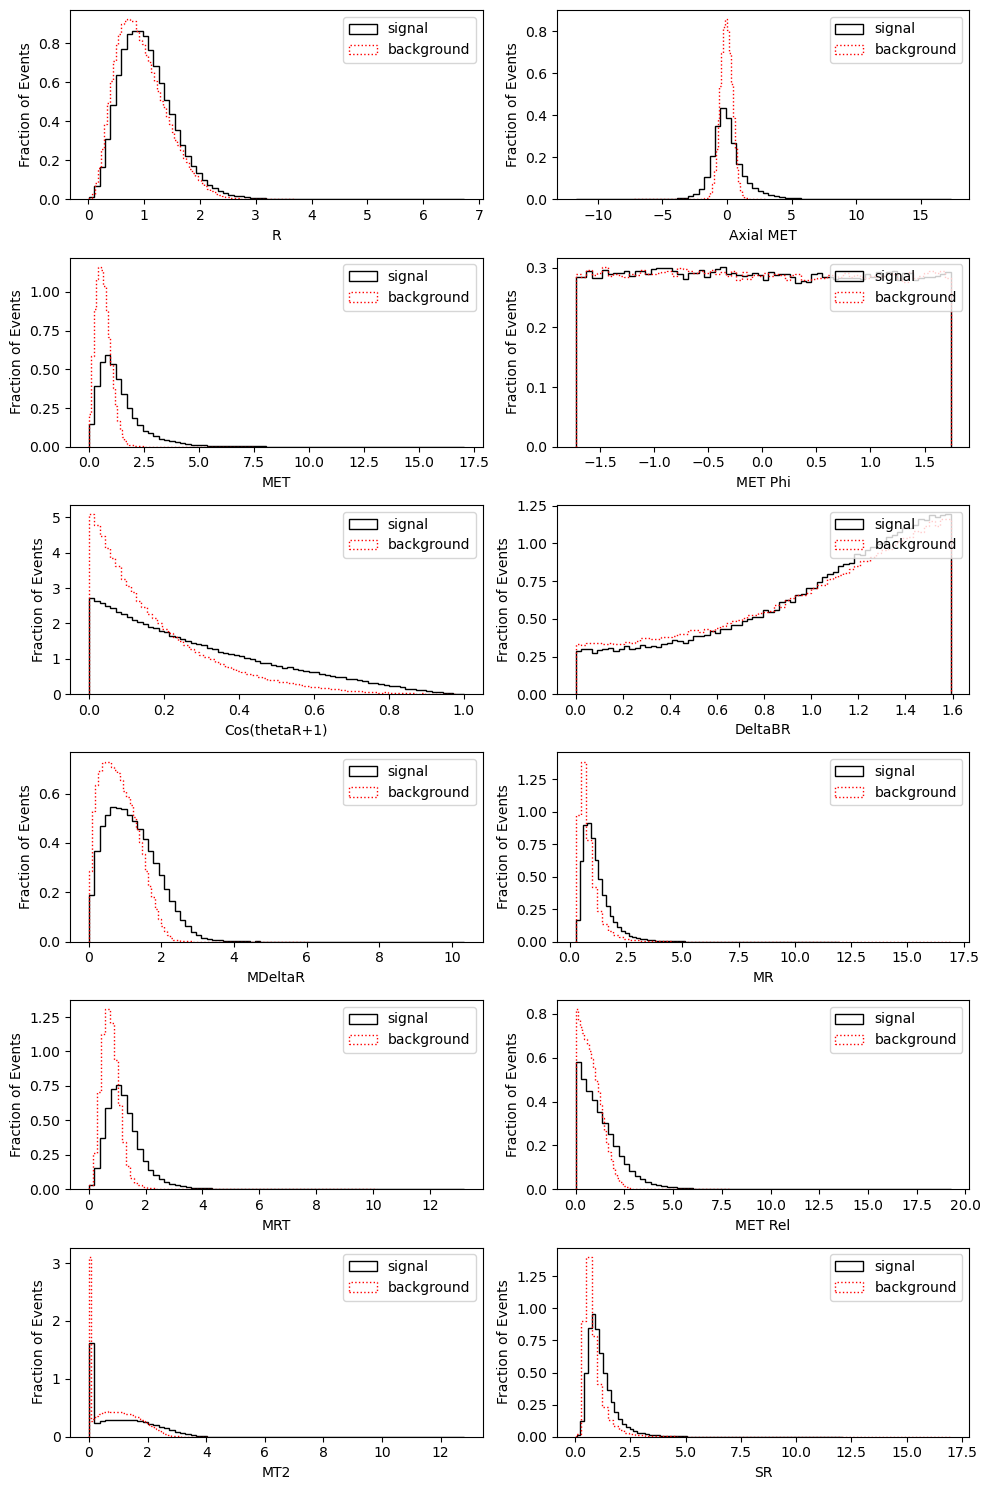

In [13]:
fig6_vars = ["R", "axial_MET", "MET", "MET_phi", "cos_theta_r1", 
           "dPhi_r_b", "M_Delta_R", "M_R", "M_TR_2", "MET_rel", "MT2", "S_R"]

x_names = ["R", "Axial MET", "MET", "MET Phi", "Cos(thetaR+1)", 
          "DeltaBR", "MDeltaR", "MR", "MRT", "MET Rel", "MT2", "SR"]

fig, axs = plt.subplots(6, 2, figsize=(10, 15))
axs = axs.flatten()  

for i, var in enumerate(fig6_vars):
    axs[i].hist(np.array(df_sig[var]),bins=70,histtype="step", color="black",label="signal",density=1, stacked=True)
    axs[i].hist(np.array(df_bkg[var]),bins=70,histtype="step", color="red", label="background",density=1, stacked=True, linestyle="dotted")
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel(x_names[i])
    axs[i].set_ylabel("Fraction of Events")
    

plt.tight_layout()
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [12]:
#Part A

all_vars = ["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", 
            "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

selection = {"Background": df["signal"] == 0, "Signal": df["signal"] == 1}

def compare_distributions(df, column_name, selections, **kwargs):
    for label,selection in selections.items():        
        _=plt.hist(df[selection][column_name],label = label, **kwargs)

    _=plt.legend()
    
def compare_scatter(df, x_var_name , y_var_name, selections, make_legend = True) :
    for label,selection in selections.items():   
        _=plt.scatter(df[selection][x_var_name], df[selection][y_var_name], label = label)

    _=plt.xlabel(x_var_name)
    _=plt.ylabel(y_var_name)

    if make_legend:
        _=plt.legend()
        
def make_pairplot(df, columns, selections, **kwargs):
    n_columns=len(columns)
    plt.figure(figsize=(15,15))
    plot_i=0
    
    for i, x_var_name in enumerate(columns):
        for j, y_var_name in enumerate(columns):
            
            plot_i += 1
            plt.subplot(n_columns, n_columns, plot_i)
            make_legend = plot_i == 1
            
            if i == j:
                compare_distributions(df,x_var_name, selctions, alpha=0.5, density=1, bins=50)
            else:
                compare_scatter(df, x_var_name, y_var_name, selections, make_legend = make_legend)
    
    plt.tight_layout()            
    plt.show()

/tmp/ipykernel_760/3726008715.py:41: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


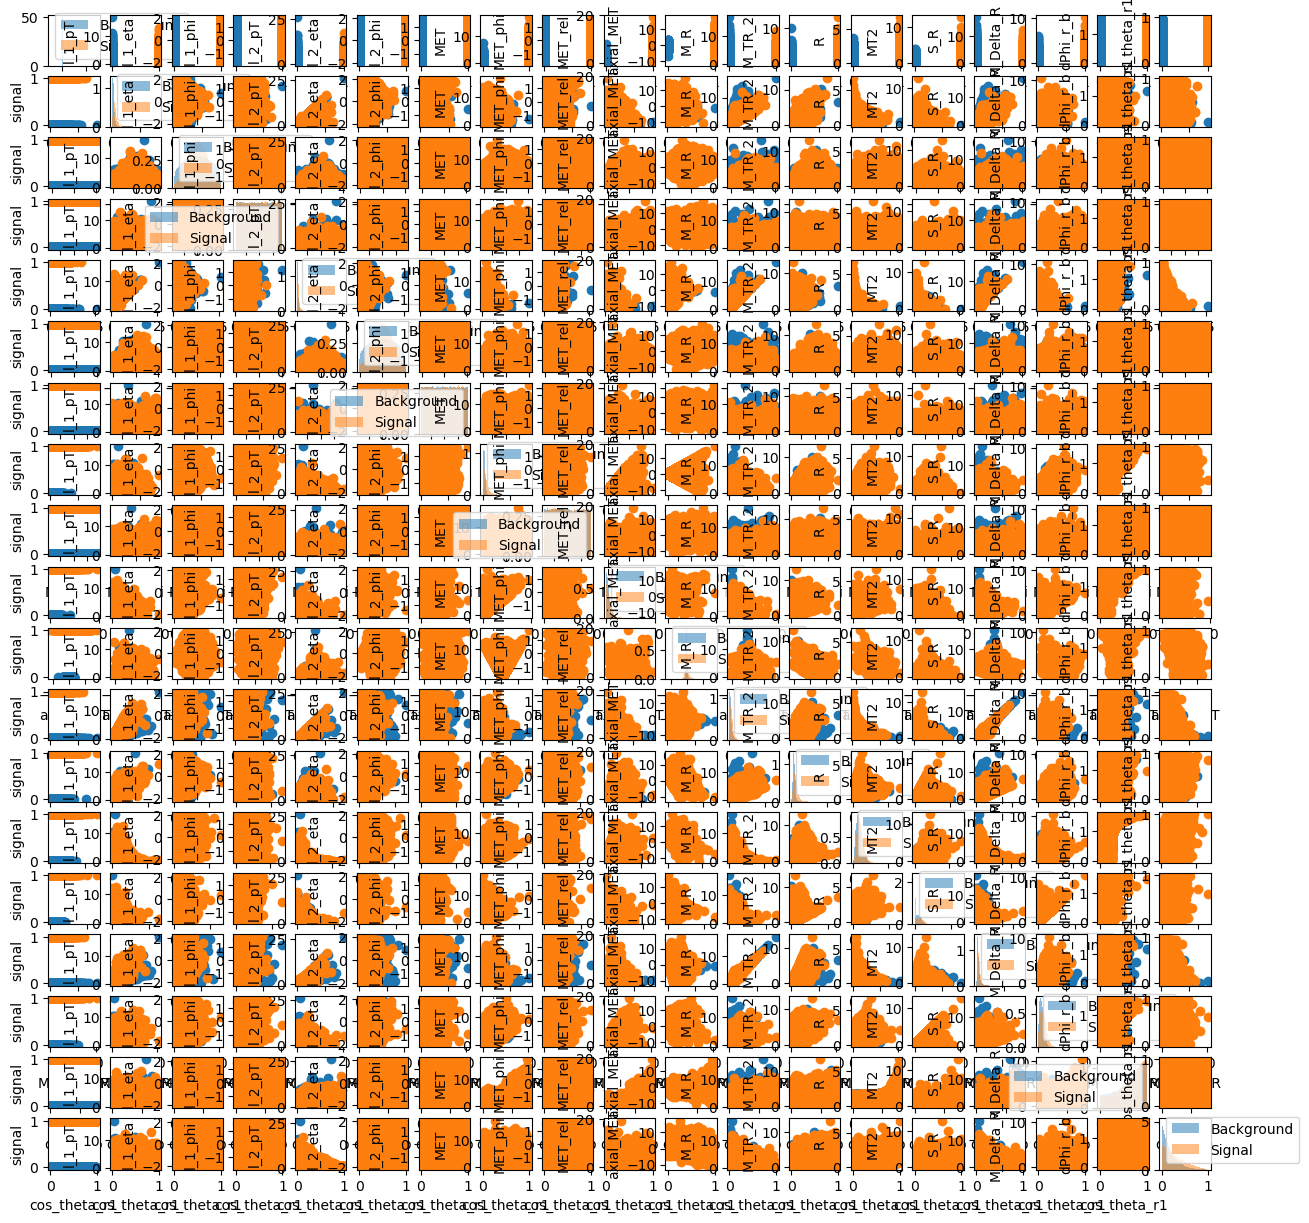

In [20]:
make_pairplot(df, all_vars, selection, alpha = 0.5, density = 1, bins = 50)

In [76]:
# Part B
# Functions are modified so that it will create the graphs first and then add them to a blank subplot,
# as opposed to creating a new subplot graph each time. Legend set to top right to increase run time. 
# Stopped making legends for the scatter plots since we don't need a legend for every graph.

def compare_distributions(ax, df, column_name, selections, **kwargs):
    for label,selection in selections.items():        
        counts, bin_edges = np.histogram(df[selection][column_name], bins=kwargs.get('bins', 50), density=True)
        ax.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), label=label, alpha=0.5)  
    
    ax.legend(loc='upper right')
    
def compare_scatter(ax, df, x_var_name , y_var_name, selections, make_legend = True) :
    for label,selection in selections.items():   
        ax.scatter(df[selection][x_var_name], df[selection][y_var_name], label = label)

    ax.set_xlabel(x_var_name)
    ax.set_ylabel(y_var_name)
    
    if make_legend:
        ax.legend(loc='upper right')
        
def make_pairplot_new(df, columns, selections, **kwargs):
    n_columns=len(columns)
    fig, axs = plt.subplots(n_columns, n_columns, figsize = (15,15))
    
    for i, x_var_name in enumerate(columns):
        for j, y_var_name in enumerate(columns):
            
            if i == j:
                compare_distributions(axs[i,j], df, x_var_name, selections, alpha=0.5, density=1, bins=50)
            else:
                compare_scatter(axs[i,j], df, x_var_name, y_var_name, selections, make_legend = False)
          
    plt.show()

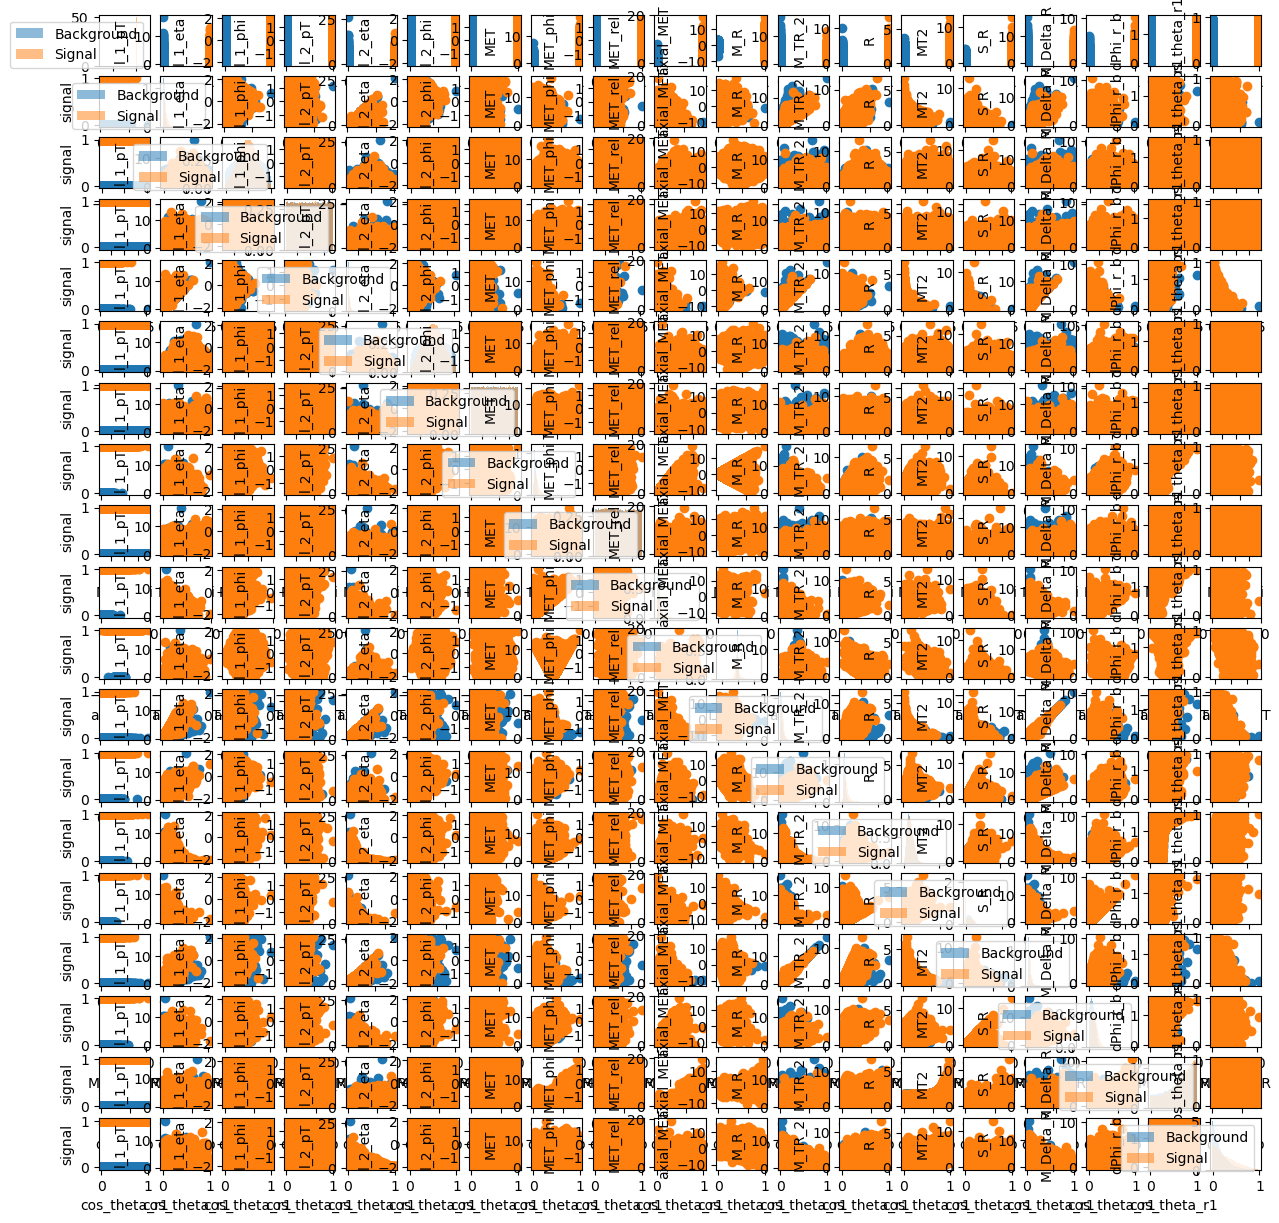

In [16]:
make_pairplot_new(df, all_vars, selection, alpha=0.5, density=1, bins=50)

In [17]:
# Part C
# Based on the above pair wise plots, it looks like M_Delta_R, M_TR_2, 
# and l_2_eta are the best at seperating signal and background 

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [31]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [32]:
# Part a

import tabulate 

In [82]:
# Part b
observables = ["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", 
            "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

low_level = ["l_1_pT", "l_2_pT", "l_1_eta", "MET", "MET_phi"]

high_level = ["R", "axial_MET", "MET", "MET_phi", "cos_theta_r1", 
             "dPhi_r_b", "M_Delta_R", "M_R", "M_TR_2", "MET_rel", "MT2", "S_R"]

observables_array = df[observables].to_numpy()
low_level_array = df[low_level].to_numpy()
high_level_array = df[high_level].to_numpy()

# Covariance Matrices
observables_covariance = np.cov(observables_array, rowvar = False)
low_level_covariance = np.cov(low_level_array, rowvar = False)
high_level_covariance = np.cov(high_level_array, rowvar = False)

# Correlation Matrices
observables_correlation = np.corrcoef(observables_array, rowvar = False)
low_level_correlation = np.corrcoef(low_level_array, rowvar = False)
high_level_correlation = np.corrcoef(high_level_array, rowvar = False)

In [83]:
# All features
print("Observables Covarience Matrix\n", observables_covariance, "\n")
print("Observables Correlation Matrix\n", observables_correlation, "\n")

# Low-level features
print("Low-Level Covarience Matrix\n", low_level_covariance, "\n")
print("Low-Level Correlation Matrix\n", low_level_correlation, "\n")

# High-level features
print("High-Level Covarience Matrix\n",  high_level_covariance, "\n")
print("High-Level Correlation Matrix\n", high_level_correlation, "\n")

Observables Covarience Matrix
 [[ 2.48277416e-01  1.33232757e-01  2.12325710e-04  2.16279213e-04
   6.39160758e-02  7.12813644e-04  1.69378344e-04  1.91292671e-01
  -2.94538711e-04  1.25444316e-01  3.95416984e-02  8.43578631e-02
   1.23325980e-01  2.55957040e-02  3.41362834e-02  8.06149789e-02
   8.51836173e-02  7.12762018e-03  2.61996466e-02]
 [ 1.33232757e-01  4.67481925e-01 -3.96674207e-04  7.66214265e-05
   3.05037988e-01 -3.48826988e-04  7.37336647e-04  2.28434336e-01
  -9.36714374e-04  9.75240349e-02 -9.73253567e-03  3.64432455e-01
   2.87223483e-01 -5.97024601e-02 -1.23988205e-02  3.42587023e-01
   9.77389248e-02 -4.69491360e-02  2.21632465e-02]
 [ 2.12325710e-04 -3.96674207e-04  1.00430144e+00 -8.57630732e-04
  -1.62905654e-04  4.08312894e-01 -1.04201049e-03 -2.14697798e-03
  -5.88968323e-04 -1.37057212e-03 -1.10889241e-03 -5.53826632e-04
  -6.68920291e-04  3.01299870e-04  4.27122683e-04 -6.04009571e-04
  -9.87471350e-04 -7.40330277e-04  3.21632240e-04]
 [ 2.16279213e-04  7.662

In [81]:
# Part c

def round_data(data):
    rounded_data = [[round(num, 2) for num in row] for row in data]
    return rounded_data

observables_covariance_rounded = round_data(observables_covariance)
observables_correlation_rounded = round_data(observables_correlation)
low_level_covariance_rounded = round_data(low_level_covariance)
low_level_correlation_rounded = round_data(low_level_correlation)
high_level_covariance_rounded = round_data(high_level_covariance)
high_level_correlation_rounded = round_data(high_level_correlation)

In [80]:
# All features
print("Observables Covarience Matrix")
display(HTML(tabulate.tabulate(observables_covariance_rounded, tablefmt = 'html', headers = observables)))
print("Observables Correlation Matrix")
display(HTML(tabulate.tabulate(observables_correlation_rounded, tablefmt = 'html', headers = observables)))

# High-Level features
print("High-Level Covarience Matrix")
display(HTML(tabulate.tabulate(high_level_covariance_rounded, tablefmt = 'html', headers = high_level)))
print("High-Level Correlation Matrix")
display(HTML(tabulate.tabulate(high_level_correlation_rounded, tablefmt = 'html', headers = high_level)))

# Low-Level features
print("Low-Level Covarience Matrix")
display(HTML(tabulate.tabulate(low_level_covariance_rounded, tablefmt = 'html', headers = low_level)))
print("Low-Level Correlation Matrix")
display(HTML(tabulate.tabulate(low_level_correlation_rounded, tablefmt = 'html', headers = low_level)))

Observables Covarience Matrix


signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0.25,0.13,0,0,0.06,0,0,0.19,-0,0.13,0.04,0.08,0.12,0.03,0.03,0.08,0.09,0.01,0.03
0.13,0.47,-0,0,0.31,-0,0,0.23,-0,0.1,-0.01,0.36,0.29,-0.06,-0.01,0.34,0.1,-0.05,0.02
0,-0,1,-0,-0,0.41,-0,-0,-0,-0,-0,-0,-0,0,0,-0,-0,-0,0
0,0,-0,1,0,0,-0.27,0,-0.18,0,-0,0,0,0,0,0,0,0,0
0.06,0.31,-0,0,0.43,-0,0,0.08,-0,-0,0.05,0.33,0.16,-0.1,-0.07,0.32,0.01,-0,-0.03
0,-0,0.41,0,-0,1.01,0,0,-0,0,-0,-0,0,0,0,-0,0,-0,0
0,0,-0,-0.27,0,0,1,-0,-0.04,0,-0,0,0,0,0,0,0,-0,0
0.19,0.23,-0,0,0.08,0,-0,0.76,-0,0.55,0.15,0.14,0.37,0.19,0.15,0.17,0.32,0.15,0.07
-0,-0,-0,-0.18,-0,-0,-0.04,-0,1,-0,-0,-0,-0,-0,0,-0,-0,-0,0
0.13,0.1,-0,0,-0,0,0,0.55,-0,0.79,-0.12,0.04,0.3,0.25,0.41,0.08,0.41,0.15,0.06


Observables Correlation Matrix


signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,0.39,0,0,0.2,0,0,0.44,-0,0.28,0.08,0.27,0.43,0.11,0.08,0.26,0.27,0.03,0.27
0.39,1,-0,0,0.68,-0,0,0.38,-0,0.16,-0.01,0.85,0.72,-0.19,-0.02,0.81,0.23,-0.16,0.16
0,-0,1,-0,-0,0.41,-0,-0,-0,-0,-0,-0,-0,0,0,-0,-0,-0,0
0,0,-0,1,0,0,-0.27,0,-0.18,0,-0,0,0,0,0,0,0,0,0
0.2,0.68,-0,0,1,-0,0,0.14,-0,-0,0.08,0.8,0.43,-0.32,-0.12,0.8,0.01,-0.01,-0.22
0,-0,0.41,0,-0,1,0,0,-0,0,-0,-0,0,0,0,-0,0,-0,0
0,0,-0,-0.27,0,0,1,-0,-0.04,0,-0,0,0,0,0,0,0,-0,0
0.44,0.38,-0,0,0.14,0,-0,1,-0,0.7,0.18,0.26,0.72,0.46,0.21,0.31,0.58,0.38,0.42
-0,-0,-0,-0.18,-0,-0,-0.04,-0,1,-0.01,-0,-0,-0,-0,0,-0,-0,-0,0
0.28,0.16,-0,0,-0,0,0,0.7,-0.01,1,-0.13,0.08,0.58,0.59,0.54,0.15,0.75,0.38,0.32


High-Level Covarience Matrix


R,axial_MET,MET,MET_phi,cos_theta_r1,dPhi_r_b,M_Delta_R,M_R,M_TR_2,MET_rel,MT2,S_R
0.22,-0.18,0.19,-0,0.06,0.09,0.17,-0.11,0.1,0.25,0.23,-0.08
-0.18,1.01,0.15,-0,-0.05,-0.03,-0.23,0.02,-0.19,-0.12,-0.46,-0.04
0.19,0.15,0.76,-0,0.07,0.15,0.32,0.14,0.37,0.55,0.15,0.17
-0,-0,-0,1,0,-0,-0,-0,-0,-0,0,-0
0.06,-0.05,0.07,0,0.04,0.01,0.04,-0.01,0.05,0.06,0.04,-0.01
0.09,-0.03,0.15,-0,0.01,0.19,0.04,-0.03,0.06,0.15,0.02,-0
0.17,-0.23,0.32,-0,0.04,0.04,0.39,0.07,0.24,0.41,0.43,0.1
-0.11,0.02,0.14,-0,-0.01,-0.03,0.07,0.39,0.21,0.04,-0.04,0.38
0.1,-0.19,0.37,-0,0.05,0.06,0.24,0.21,0.34,0.3,0.19,0.23
0.25,-0.12,0.55,-0,0.06,0.15,0.41,0.04,0.3,0.79,0.41,0.08


High-Level Correlation Matrix


R,axial_MET,MET,MET_phi,cos_theta_r1,dPhi_r_b,M_Delta_R,M_R,M_TR_2,MET_rel,MT2,S_R
1,-0.38,0.46,-0,0.63,0.42,0.56,-0.38,0.38,0.59,0.57,-0.29
-0.38,1,0.18,-0,-0.27,-0.06,-0.37,0.03,-0.32,-0.13,-0.54,-0.07
0.46,0.18,1,-0,0.42,0.38,0.58,0.26,0.72,0.7,0.21,0.31
-0,-0,-0,1,0,-0,-0,-0,-0,-0.01,0,-0
0.63,-0.27,0.42,0,1,0.11,0.32,-0.12,0.45,0.32,0.26,-0.09
0.42,-0.06,0.38,-0,0.11,1,0.16,-0.11,0.23,0.38,0.06,-0.01
0.56,-0.37,0.58,-0,0.32,0.16,1,0.19,0.67,0.75,0.81,0.25
-0.38,0.03,0.26,-0,-0.12,-0.11,0.19,1,0.58,0.08,-0.07,0.98
0.38,-0.32,0.72,-0,0.45,0.23,0.67,0.58,1,0.58,0.38,0.64
0.59,-0.13,0.7,-0.01,0.32,0.38,0.75,0.08,0.58,1,0.54,0.15


Low-Level Covarience Matrix


l_1_pT,l_2_pT,l_1_eta,MET,MET_phi
0.47,0.31,-0,0.23,-0
0.31,0.43,-0,0.08,-0
-0,-0,1,-0,-0
0.23,0.08,-0,0.76,-0
-0,-0,-0,-0,1


Low-Level Correlation Matrix


l_1_pT,l_2_pT,l_1_eta,MET,MET_phi
1,0.68,-0,0.38,-0
0.68,1,-0,0.14,-0
-0,-0,1,-0,-0
0.38,0.14,-0,1,-0
-0,-0,-0,-0,1


In [79]:
# Part d

def corr_covar_tabulate(dataset, title, features, sig_figs = 2):
    arr = dataset[features].to_numpy()
    cov_matrix = np.cov(arr, rowvar = False)
    corr_matrix = np.corrcoef(arr, rowvar = False)
    
    cov_rounded = round_data(cov_matrix)
    corr_rounded = round_data(corr_matrix)
    
    cov_table = HTML(tabulate.tabulate(cov_rounded, tablefmt = 'html', headers = features))
    corr_table = HTML(tabulate.tabulate(corr_rounded, tablefmt = 'html', headers = features))
    
    print(f"{title} Covariance Table")
    display(cov_table)
    print(f"{title} Correlation Table")
    display(corr_table)

In [78]:
corr_covar_tabulate(df, "Observables", observables)
corr_covar_tabulate(df, "Low-Level", low_level)
corr_covar_tabulate(df, "High-Level", high_level)

Observables Covariance Table


signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0.25,0.13,0,0,0.06,0,0,0.19,-0,0.13,0.04,0.08,0.12,0.03,0.03,0.08,0.09,0.01,0.03
0.13,0.47,-0,0,0.31,-0,0,0.23,-0,0.1,-0.01,0.36,0.29,-0.06,-0.01,0.34,0.1,-0.05,0.02
0,-0,1,-0,-0,0.41,-0,-0,-0,-0,-0,-0,-0,0,0,-0,-0,-0,0
0,0,-0,1,0,0,-0.27,0,-0.18,0,-0,0,0,0,0,0,0,0,0
0.06,0.31,-0,0,0.43,-0,0,0.08,-0,-0,0.05,0.33,0.16,-0.1,-0.07,0.32,0.01,-0,-0.03
0,-0,0.41,0,-0,1.01,0,0,-0,0,-0,-0,0,0,0,-0,0,-0,0
0,0,-0,-0.27,0,0,1,-0,-0.04,0,-0,0,0,0,0,0,0,-0,0
0.19,0.23,-0,0,0.08,0,-0,0.76,-0,0.55,0.15,0.14,0.37,0.19,0.15,0.17,0.32,0.15,0.07
-0,-0,-0,-0.18,-0,-0,-0.04,-0,1,-0,-0,-0,-0,-0,0,-0,-0,-0,0
0.13,0.1,-0,0,-0,0,0,0.55,-0,0.79,-0.12,0.04,0.3,0.25,0.41,0.08,0.41,0.15,0.06


Observables Correlation Table


signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,0.39,0,0,0.2,0,0,0.44,-0,0.28,0.08,0.27,0.43,0.11,0.08,0.26,0.27,0.03,0.27
0.39,1,-0,0,0.68,-0,0,0.38,-0,0.16,-0.01,0.85,0.72,-0.19,-0.02,0.81,0.23,-0.16,0.16
0,-0,1,-0,-0,0.41,-0,-0,-0,-0,-0,-0,-0,0,0,-0,-0,-0,0
0,0,-0,1,0,0,-0.27,0,-0.18,0,-0,0,0,0,0,0,0,0,0
0.2,0.68,-0,0,1,-0,0,0.14,-0,-0,0.08,0.8,0.43,-0.32,-0.12,0.8,0.01,-0.01,-0.22
0,-0,0.41,0,-0,1,0,0,-0,0,-0,-0,0,0,0,-0,0,-0,0
0,0,-0,-0.27,0,0,1,-0,-0.04,0,-0,0,0,0,0,0,0,-0,0
0.44,0.38,-0,0,0.14,0,-0,1,-0,0.7,0.18,0.26,0.72,0.46,0.21,0.31,0.58,0.38,0.42
-0,-0,-0,-0.18,-0,-0,-0.04,-0,1,-0.01,-0,-0,-0,-0,0,-0,-0,-0,0
0.28,0.16,-0,0,-0,0,0,0.7,-0.01,1,-0.13,0.08,0.58,0.59,0.54,0.15,0.75,0.38,0.32


Low-Level Covariance Table


l_1_pT,l_2_pT,l_1_eta,MET,MET_phi
0.47,0.31,-0,0.23,-0
0.31,0.43,-0,0.08,-0
-0,-0,1,-0,-0
0.23,0.08,-0,0.76,-0
-0,-0,-0,-0,1


Low-Level Correlation Table


l_1_pT,l_2_pT,l_1_eta,MET,MET_phi
1,0.68,-0,0.38,-0
0.68,1,-0,0.14,-0
-0,-0,1,-0,-0
0.38,0.14,-0,1,-0
-0,-0,-0,-0,1


High-Level Covariance Table


R,axial_MET,MET,MET_phi,cos_theta_r1,dPhi_r_b,M_Delta_R,M_R,M_TR_2,MET_rel,MT2,S_R
0.22,-0.18,0.19,-0,0.06,0.09,0.17,-0.11,0.1,0.25,0.23,-0.08
-0.18,1.01,0.15,-0,-0.05,-0.03,-0.23,0.02,-0.19,-0.12,-0.46,-0.04
0.19,0.15,0.76,-0,0.07,0.15,0.32,0.14,0.37,0.55,0.15,0.17
-0,-0,-0,1,0,-0,-0,-0,-0,-0,0,-0
0.06,-0.05,0.07,0,0.04,0.01,0.04,-0.01,0.05,0.06,0.04,-0.01
0.09,-0.03,0.15,-0,0.01,0.19,0.04,-0.03,0.06,0.15,0.02,-0
0.17,-0.23,0.32,-0,0.04,0.04,0.39,0.07,0.24,0.41,0.43,0.1
-0.11,0.02,0.14,-0,-0.01,-0.03,0.07,0.39,0.21,0.04,-0.04,0.38
0.1,-0.19,0.37,-0,0.05,0.06,0.24,0.21,0.34,0.3,0.19,0.23
0.25,-0.12,0.55,-0,0.06,0.15,0.41,0.04,0.3,0.79,0.41,0.08


High-Level Correlation Table


R,axial_MET,MET,MET_phi,cos_theta_r1,dPhi_r_b,M_Delta_R,M_R,M_TR_2,MET_rel,MT2,S_R
1,-0.38,0.46,-0,0.63,0.42,0.56,-0.38,0.38,0.59,0.57,-0.29
-0.38,1,0.18,-0,-0.27,-0.06,-0.37,0.03,-0.32,-0.13,-0.54,-0.07
0.46,0.18,1,-0,0.42,0.38,0.58,0.26,0.72,0.7,0.21,0.31
-0,-0,-0,1,0,-0,-0,-0,-0,-0.01,0,-0
0.63,-0.27,0.42,0,1,0.11,0.32,-0.12,0.45,0.32,0.26,-0.09
0.42,-0.06,0.38,-0,0.11,1,0.16,-0.11,0.23,0.38,0.06,-0.01
0.56,-0.37,0.58,-0,0.32,0.16,1,0.19,0.67,0.75,0.81,0.25
-0.38,0.03,0.26,-0,-0.12,-0.11,0.19,1,0.58,0.08,-0.07,0.98
0.38,-0.32,0.72,-0,0.45,0.23,0.67,0.58,1,0.58,0.38,0.64
0.59,-0.13,0.7,-0.01,0.32,0.38,0.75,0.08,0.58,1,0.54,0.15


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 